In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#just some example data
df = pd.read_csv('data/data_scientist.csv')

In [33]:
df.head()

,email_hours,gym_hours,data_scientist
0,18.995746,6.879446,1
1,19.178514,5.954391,1
2,20.895603,11.638996,1
3,22.242337,10.323360,1
4,38.854161,26.899764,0


###Lots of columns? Quickly look at datatype:

In [17]:
#find out what datatypes I have 
df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [21]:
#look at what data is not continuous/float:
df.select_dtypes(include=['int64']).head()

,data_scientist
0,1
1,1
2,1
3,1
4,0


In [25]:
def examine_categorical_columns(df, datatype = 'int64'):
    '''INPUT: takes a dataframe with suspected categorical variables
    Prints out all the unique values for each column. 
    Useful to check how varied the column is'''
    #get a list of the columns that are categorical variables 
    column_names = df.select_dtypes(include=[datatype]).columns.tolist()

    #check to see if the column unique values make sense/ are categorical
    for col in column_names:
        print col, '\n', df[col].unique(), '\n'

In [24]:
examine_categorical_columns(df)

data_scientist 
[1 0] 



In [ ]:
#turn categorical columns into dummy variables for analysis
def make_dummy_columns(df, column_names):
    '''
    PARAMETERS
    df: a dataframe containing categorical variables
    column_names: a list of the name of columns 
    in df with categorical variables
    
    OUTPUT:
    For every column in column_names, creates dummy variables. 
    Returns a new dataframe with the dummy variables
    '''
    for colname in column_names:
        df = pd.concat([df, pd.get_dummies(df[colname])],\
                       axis = 1).drop(colname, 1)
    return df

##Replace columns Nans with Means

In [26]:
#thanks, stack overflow!
import  scipy.stats as stats

def replace_nans_with_mean(df):
    '''Takes a dataframe with Nan values.
    Returns a numpy matrix where all the nans have been
    replaced with the column average value.'''
    matrix = df.values
    #determine the mean for each column
    col_mean = stats.nanmean(matrix,axis=0)
    #obtain the indexes of values to replace
    indexs = np.where(np.isnan(matrix))
    matrix[indexs]=np.take(col_mean,indexs[1])
    return matrix


In [ ]:
Are names correlated with the economy? 
Another idea: popular names in other countries. how is this realted to american popularity?

##Plot with groupby!!!

In [42]:
def plot_groups(df, group_label, x_col, y_col):
    '''PRAMETERS
    grouplabel - column name to categorize each distinct group
    x_col, y_col - column names of the x and y axis respectively'''
    
    groups = df.groupby(group_label)

    # Plot
    plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
    colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

    fig, ax = plt.subplots()
    ax.set_color_cycle(colors)
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group[x_col], group[y_col], marker='o', linestyle='', ms=10, label=name)
    ax.legend(numpoints=1, loc='upper left')

    plt.show()

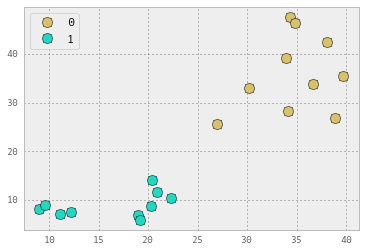

In [43]:
plot_groups(df, 'data_scientist', 'email_hours', 'gym_hours')